In [2]:
import numpy as np
import scipy as sp
import sys
import os

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.parallel_tempering import *
import matplotlib.pyplot as plt

In [2]:
# First, define some variables we will use
Beta_max = 1.0 # This is the target beta 
Beta_min = 0.01
f = lambda x: x
f2 = lambda x: x**2

In [3]:
moment1 = [] # simulate mean of X
moment2 = [] # simulate variance of X
for n in range(10,1501,10):
    betas = generate_temp_ladder(n, Beta_min, Beta_max)
    xs = parallel_tempering(n, betas)
    moment1.append(np.mean(f(xs)))
    moment2.append(np.mean(f2(xs)))

In [28]:
# calculate the true variance when bate = 1/1 = 1
true_variance = (sp.integrate.quad(lambda x: (x**2)*np.exp(-(x**2-1)**2),-np.inf, np.inf)[0])/(sp.integrate.quad(lambda x: np.exp(-(x**2-1)**2),-np.inf, np.inf)[0])
true_variance

0.8327454871283799

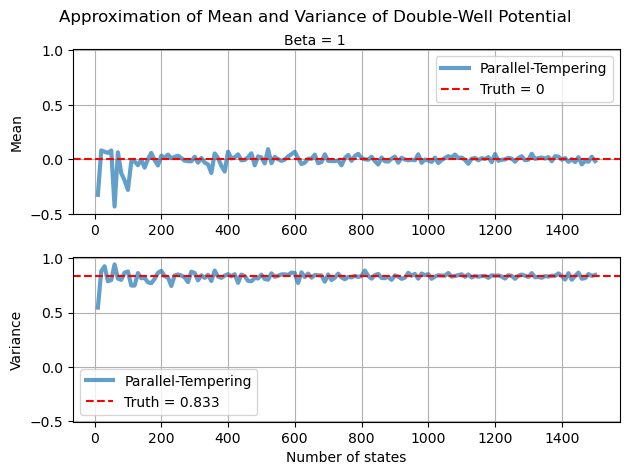

In [45]:
# Make the plot
fig, (ax1, ax2) = plt.subplots(2, sharey=True)
ax1.plot(range(10,1501,10), moment1, alpha=0.7, lw=3, label='Parallel-Tempering')
ax1.axhline(y=0, color='r', ls='--', label = 'Truth = 0')
ax1.set_ylabel('Mean')
ax1.grid()
ax1.legend()
ax2.plot(range(10,1501,10), moment2, alpha=0.7, lw=3, label = 'Parallel-Tempering')
ax2.axhline(y=true_variance, color='r', ls='--', label = f'Truth = {true_variance:.3f}')
ax2.set_ylabel('Variance')
ax2.grid()
ax2.legend()
plt.suptitle('Approximation of Mean and Variance of Double-Well Potential')
fig.text(0.5, 0.93, "Beta = 1", ha='center', va='top', fontsize=10)
plt.xlabel('Number of states')
plt.tight_layout()
plt.savefig('Plot_PT.png')

